<a href="https://colab.research.google.com/github/shreyasrajesh0308/NNDL-proj/blob/main/gru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Paper: 

### Load Data 

Load preprocessed data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [3]:

X_test = np.load("/content/drive/MyDrive/eeg_project/X_test.npy")
y_test = np.load("/content/drive/MyDrive/eeg_project/y_test.npy")
person_train_valid = np.load("/content/drive/MyDrive/eeg_project/person_train_valid.npy")
X_train_valid = np.load("/content/drive/MyDrive/eeg_project/X_train_valid.npy")
y_train_valid = np.load("/content/drive/MyDrive/eeg_project/y_train_valid.npy")
person_test = np.load("/content/drive/MyDrive/eeg_project/person_test.npy")


In [4]:
print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))


Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


In [5]:
print(np.unique(y_train_valid))
print(np.unique(y_test))

[769 770 771 772]
[769 770 771 772]


In [6]:
num_classes = 4
y_train_valid = y_train_valid-769
y_test = y_test-769
y_train_valid = keras.utils.to_categorical(y_train_valid, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Indices for subject one training 

In [7]:
train_indeces = [ i for i in range(len(person_train_valid)) if person_train_valid[i]==0]
X_train_subject_1 = X_train_valid[train_indeces]
y_train_subject_1 = y_train_valid[train_indeces]

### Indices for subject one testing 

In [8]:
test_indeces = [ i for i in range(len(person_test)) if person_test[i]==0]
X_test_subject_1 = X_test[test_indeces]
y_test_subject_1 = y_test[test_indeces]

In [9]:
print(X_train_subject_1.shape)
print(X_test_subject_1.shape)
print(y_train_subject_1.shape)
print(y_test_subject_1.shape)

(237, 22, 1000)
(50, 22, 1000)
(237, 4)
(50, 4)


In [10]:
num_classes = len(np.unique(y_train_valid))

In [11]:
X_train_subject_1 = np.swapaxes(X_train_subject_1, 1, 2)
X_test_subject_1 = np.swapaxes(X_test_subject_1, 1, 2)

In [12]:
X_train_subject_1.shape

(237, 1000, 22)

In [13]:
X_test_subject_1.shape

(50, 1000, 22)

## Building a baseline with an GRU model with all channels, trained with one subject data

In [14]:
print(X_train_subject_1.shape, y_train_subject_1.shape)

(237, 1000, 22) (237, 4)


In [67]:
def create_model():
  model = keras.Sequential()
  model.add(
      keras.layers.Bidirectional(
        layers.GRU(512)
      )
  )
  model.add(keras.layers.Dropout(rate=0.2))
  model.add(keras.layers.Dense(units=512, activation='relu'))
  model.add(keras.layers.Dense(y_train_subject_1.shape[1], activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [17]:
# model = KerasClassifier(build_fn=create_model, verbose=0)
# # define the grid search parameters
# batch_size = [10, 20, 40, 60, 80, 100]
# epochs = [5,10]
# param_grid = dict(batch_size=batch_size, epochs=epochs)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train_subject_1, y_train_subject_1)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
36 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/us

AttributeError: ignored

In [151]:
model = keras.Sequential()
initializer = keras.initializers.HeNormal()
model.add(
    keras.layers.Bidirectional(
      layers.GRU(64)
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=4096, activation='relu'))
model.add(keras.layers.Dense(units=4096, activation='relu'))
model.add(keras.layers.Dense(y_train_valid.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [152]:
history = model.fit(
    X_train_subject_1, y_train_subject_1,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
14/14 [==============================] - 5s 124ms/step - loss: 2.3327 - acc: 0.2723 - val_loss: 1.6029 - val_acc: 0.2917
Epoch 2/30
14/14 [==============================] - 1s 69ms/step - loss: 1.3553 - acc: 0.3756 - val_loss: 1.4375 - val_acc: 0.3333
Epoch 3/30
14/14 [==============================] - 1s 69ms/step - loss: 1.2699 - acc: 0.4225 - val_loss: 1.4875 - val_acc: 0.2917
Epoch 4/30
14/14 [==============================] - 1s 69ms/step - loss: 1.1045 - acc: 0.5258 - val_loss: 1.5428 - val_acc: 0.2500
Epoch 5/30
14/14 [==============================] - 1s 69ms/step - loss: 1.0614 - acc: 0.5399 - val_loss: 1.7199 - val_acc: 0.2083
Epoch 6/30
14/14 [==============================] - 1s 70ms/step - loss: 1.0294 - acc: 0.5540 - val_loss: 1.7000 - val_acc: 0.3333
Epoch 7/30
14/14 [==============================] - 1s 71ms/step - loss: 0.9626 - acc: 0.6338 - val_loss: 1.7928 - val_acc: 0.2917
Epoch 8/30
14/14 [==============================] - 1s 68ms/step - loss: 0.8291 - 

In [153]:
model.summary()

Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_107 (Bidirect  (None, 128)              33792     
 ional)                                                          
                                                                 
 dropout_107 (Dropout)       (None, 128)               0         
                                                                 
 dense_224 (Dense)           (None, 4096)              528384    
                                                                 
 dense_225 (Dense)           (None, 4096)              16781312  
                                                                 
 dense_226 (Dense)           (None, 4)                 16388     
                                                                 
Total params: 17,359,876
Trainable params: 17,359,876
Non-trainable params: 0
________________________________________

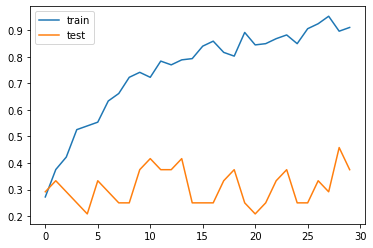

In [154]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend();

In [155]:
model.evaluate(X_test_subject_1, y_test_subject_1)

2/2 [==============================] - 0s 54ms/step - loss: 2.3228 - acc: 0.3600


[2.322794198989868, 0.36000001430511475]

In [59]:

accuracies = []
for drop in [0,0.1,0.2,0.4,0.5,0.7]:
  for batch in [8,16,32,64,128]:
    model = keras.Sequential()
    model.add(
        keras.layers.Bidirectional(
          layers.GRU(8)
        )
    )
    model.add(keras.layers.Dropout(rate=drop))
    model.add(keras.layers.Dense(units=2048, activation='relu'))
    model.add(keras.layers.Dense(y_train_subject_1.shape[1], activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    history = model.fit(
      X_train_subject_1, y_train_subject_1,
      epochs=20,
      batch_size=batch,
      validation_split=0.1,
      shuffle=False
    )
    accuracies.append(np.array([history.history['val_acc'][-1], drop, batch]))





Epoch 1/20
27/27 [==============================] - 5s 71ms/step - loss: 1.4136 - acc: 0.2582 - val_loss: 1.4191 - val_acc: 0.2917
Epoch 2/20
27/27 [==============================] - 1s 45ms/step - loss: 1.2499 - acc: 0.4413 - val_loss: 1.4505 - val_acc: 0.2917
Epoch 3/20
17/27 [=================>............] - ETA: 0s - loss: 1.1311 - acc: 0.5515

KeyboardInterrupt: ignored

In [44]:
accuracies - np.array(accuracies)
best_drop = accuracies[np.argmax(accuracies[:,0]),1]
best_batch = accuracies[np.argmax(accuracies[:,0]),2]
accuracies - np.array(accuracies)
print("Best validation accuracy", np.max(accuracies[:,0]), "with Dropout Rate",
      best_drop, "and batch size", best_batch)

Best validation accuracy 0.375 with Dropout Rate 0.5 and batch size 64.0


In [43]:
accuracies = np.array(accuracies)
accuracies[np.argmax(accuracies[:,0]),1]

0.5

In [25]:
print(accuracies)

[[3.7837493419647217, 0, 8], [3.2250747680664062, 0, 16], [3.2023017406463623, 0, 32], [3.0361130237579346, 0, 64], [3.1093151569366455, 0, 128], [5.271199703216553, 0.1, 8], [3.720784902572632, 0.1, 16], [3.4172661304473877, 0.1, 32], [3.1512153148651123, 0.1, 64], [3.2362709045410156, 0.1, 128], [4.4613800048828125, 0.2, 8], [3.5623245239257812, 0.2, 16], [3.413505792617798, 0.2, 32], [3.407851457595825, 0.2, 64], [3.1940925121307373, 0.2, 128], [4.846121788024902, 0.4, 8], [4.416743755340576, 0.4, 16], [3.9036808013916016, 0.4, 32], [3.706195831298828, 0.4, 64], [3.215125799179077, 0.4, 128], [5.031581878662109, 0.5, 8], [4.087917804718018, 0.5, 16], [4.490284442901611, 0.5, 32], [3.9504497051239014, 0.5, 64], [3.636662244796753, 0.5, 128], [4.16558837890625, 0.7, 8], [3.8689358234405518, 0.7, 16], [3.397963285446167, 0.7, 32], [3.514254331588745, 0.7, 64], [3.5038821697235107, 0.7, 128]]


## GRU model with all subjects

In [148]:
model = keras.Sequential()
initializer = keras.initializers.HeNormal()
model.add(
    keras.layers.Bidirectional(
      layers.GRU(64)
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=4096, activation='relu'))
model.add(keras.layers.Dense(units=4096, activation='relu'))
model.add(keras.layers.Dense(y_train_valid.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [149]:
history = model.fit(
    X_train_valid, y_train_valid,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    shuffle=True
)

Epoch 1/30
119/119 [==============================] - 5s 16ms/step - loss: 1.5451 - acc: 0.2706 - val_loss: 1.3908 - val_acc: 0.3019
Epoch 2/30
119/119 [==============================] - 1s 10ms/step - loss: 1.3236 - acc: 0.3726 - val_loss: 1.4060 - val_acc: 0.2783
Epoch 3/30
119/119 [==============================] - 1s 10ms/step - loss: 1.2912 - acc: 0.3962 - val_loss: 1.3629 - val_acc: 0.3632
Epoch 4/30
119/119 [==============================] - 1s 10ms/step - loss: 1.2291 - acc: 0.4556 - val_loss: 1.4468 - val_acc: 0.2972
Epoch 5/30
119/119 [==============================] - 1s 10ms/step - loss: 1.2095 - acc: 0.4640 - val_loss: 1.4063 - val_acc: 0.3113
Epoch 6/30
119/119 [==============================] - 1s 10ms/step - loss: 1.1571 - acc: 0.5102 - val_loss: 1.4182 - val_acc: 0.3349
Epoch 7/30
119/119 [==============================] - 1s 10ms/step - loss: 1.1167 - acc: 0.5271 - val_loss: 1.4101 - val_acc: 0.3160
Epoch 8/30
119/119 [==============================] - 1s 10ms/step - 

In [150]:
model.evaluate(X_test, y_test)

14/14 [==============================] - 0s 6ms/step - loss: 1.7084 - acc: 0.3634


[1.7083550691604614, 0.3634311556816101]

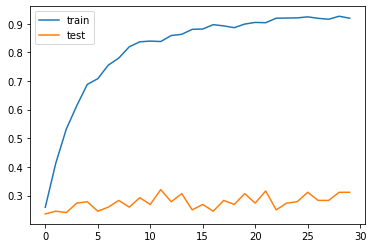

In [114]:
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend();